In [1]:

import numpy as np
from sklearn import datasets 
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import seaborn as sns

from itertools import product
import multiprocessing as mp

from math import log

In [2]:
mnist = datasets.load_digits(return_X_y=True)
X, y = mnist

n = int(np.ceil(np.sqrt(X.shape[1])))

print(n)

print(X.shape, y.shape)

8
(1797, 64) (1797,)


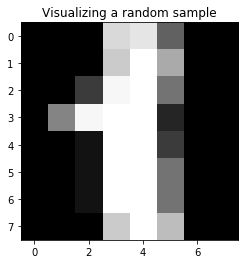

In [3]:
plt.imshow(np.reshape(X[1], [n,n]), cmap='Greys_r'); 
plt.title('Visualizing a random sample'); plt.show()